In [ ]:
!pip install unidecode twython tweepy beautifulsoup4 tika

     |████████████████████████████████| 235 kB 4.9 MB/s 
  Created wheel for tika: filename=tika-1.24-py3-none-any.whl size=32891 sha256=5da865e1bcace2762f38feb71411bd93f0148426c60c31d43a1096879966629c
  Stored in directory: /root/.cache/pip/wheels/ec/2b/38/58ff05467a742e32f67f5d0de048fa046e764e2fbb25ac93f3
Successfully built tika


# Crawling Data

In [ ]:
import warnings; warnings.simplefilter('ignore')
import tweepy, json, nltk, urllib.request, requests
from urllib.request import Request, urlopen
from twython import TwythonStreamer
from bs4 import BeautifulSoup as bs

In [ ]:
# API Keys

Ck = 'zZ0CKaylFTgYxiLT3sgP2XK3k' # consumer_key
Cs = 'QfeNKlQHfGItzcHtSlKB0AfWT03LdBXKXpeWyPuHr1N1HkXwfX' # consumer_secret
At = '630229681-DKefsNZXg0FoZtLpFjTuAZyxPkojLINB7WXbMKCN' # access_token
As = 'RUP2Mk2xXq216QOYCEnr5qL3l0NvqpL9F7WWaWBk71lFd' # access_secret

'Done'

'Done'

In [ ]:
def connect(Ck, Cs, At, As):
    auth = tweepy.auth.OAuthHandler(Ck, Cs)
    auth.set_access_token(At, As)
    api = tweepy.API(auth)
    usr_ = api.verify_credentials()
    print('Welcome "{}" you are now connected to twitter server'.format(usr_.name))
    return api

In [ ]:
# Koneksi ke twitter
twt = connect(Ck, Cs, At, As)

Welcome "esteh" you are now connected to twitter server


In [ ]:
!pip install jsonpickle

In [ ]:
import tweepy,sys,jsonpickle

qry='omicron' #query yang akan di cari
maxTweets =  400 # Isi sembarang nilai sesuai kebutuhan anda
tweetsPerQry = 100  # Jangan isi lebih dari 100, ndak boleh oleh Twitter
fName= 'omicron.json' # Nama File hasil Crawling

auth = tweepy.AppAuthHandler(Ck, Cs)
api = tweepy.API(auth, wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

if (not api):
    sys.exit('Autentikasi gagal, mohon cek "Consumer Key" & "Consumer Secret" Twitter anda')

sinceId, max_id, tweetCount = None, -1, 0

print("Mulai mengunduh {0} tweets".format(maxTweets))
with open(fName,'w') as f:
    while tweetCount < maxTweets:
        try:
            if (max_id <= 0):
                if (not sinceId):
                    new_tweets=api.search(q=qry,count=tweetsPerQry, lang = 'id')
                else:
                    new_tweets=api.search(q=qry,count=tweetsPerQry,lang = 'id',since_id=sinceId)
            else:
                if (not sinceId):
                    new_tweets=api.search(q=qry,count=tweetsPerQry,lang = 'id', max_id=str(max_id - 1))
                else:
                    new_tweets=api.search(q=qry,count=tweetsPerQry,lang = 'id', max_id=str(max_id - 1),since_id=sinceId)
            if not new_tweets:
                print('Tidak ada lagi Tweet ditemukan dengan Query="{0}"'.format(qry));break
            for tweet in new_tweets:
                f.write(jsonpickle.encode(tweet._json,unpicklable=False)+'\n')
            tweetCount+=len(new_tweets)
            sys.stdout.write("\r");sys.stdout.write("Jumlah Tweets telah tersimpan: %.0f" %tweetCount);sys.stdout.flush()
            max_id=new_tweets[-1].id
        except tweepy.TweepError as e:
            print("some error : " + str(e));break # error
print ('\nSelesai! {0} tweets tersimpan di "{1}"'.format(tweetCount,fName))

Mulai mengunduh 400 tweets
Jumlah Tweets telah tersimpan: 400
Selesai! 400 tweets tersimpan di "omicron.json"


In [ ]:
!git clone https://github.com/Estich85/Project_UAS.git

Cloning into 'Project_UAS'...
remote: Enumerating objects: 55, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 55 (delta 23), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (55/55), done.


In [ ]:
import pandas as pd

data1 = pd.read_json('/content/Project_UAS/data/ppkm.json', lines = True, orient = 'records')
print(data1)

                    created_at  ...  extended_entities
0    2021-12-11 15:34:49+00:00  ...                NaN
1    2021-12-11 15:34:21+00:00  ...                NaN
2    2021-12-11 15:33:03+00:00  ...                NaN
3    2021-12-11 15:31:28+00:00  ...                NaN
4    2021-12-11 15:31:00+00:00  ...                NaN
...                        ...  ...                ...
2995 2021-12-09 22:05:31+00:00  ...                NaN
2996 2021-12-09 22:05:19+00:00  ...                NaN
2997 2021-12-09 22:04:25+00:00  ...                NaN
2998 2021-12-09 22:02:26+00:00  ...                NaN
2999 2021-12-09 22:01:32+00:00  ...                NaN

[3000 rows x 30 columns]


In [ ]:
df1 = pd.DataFrame(data1)
df1.head(5)

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status,extended_entities
0,2021-12-11 15:34:49+00:00,1469692153383174145,1469692153383174144,melaksanakan patroli Woro Woro dan operasi ma...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,None,"{'id': 1403315139558838275, 'id_str': '1403315...",NaN,NaN,None,NaN,False,0,0,False,False,0.0,in,NaN,NaN,NaN,NaN,NaN
1,2021-12-11 15:34:21+00:00,1469692034118139909,1469692034118139904,melaksanakan patroli Woro Woro dan operasi ma...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,None,"{'id': 1403315139558838275, 'id_str': '1403315...",NaN,NaN,None,NaN,False,0,0,False,False,0.0,in,NaN,NaN,NaN,NaN,NaN
2,2021-12-11 15:33:03+00:00,1469691708002635784,1469691708002635776,(11/12) Operasi Yustisi gabungan bersama TNI-P...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,None,"{'id': 941189958966026240, 'id_str': '94118995...",NaN,NaN,None,NaN,False,0,0,False,False,0.0,in,NaN,NaN,NaN,NaN,NaN
3,2021-12-11 15:31:28+00:00,1469691311938686981,1469691311938686976,@melanians Loh bukannya ppkm nggkjadi meng? At...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.469589e+18,1.469589e+18,74677961.0,74677961.0,melanians,"{'id': 100443973, 'id_str': '100443973', 'name...",NaN,NaN,None,NaN,False,0,0,False,False,NaN,in,NaN,NaN,NaN,NaN,NaN
4,2021-12-11 15:31:00+00:00,1469691190828158980,1469691190828158976,RT @muslimahnewscom: MuslimahNews – Apakah ben...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 1104604159158841344, 'id_str': '1104604...",NaN,NaN,None,NaN,False,74,0,False,False,NaN,in,{'created_at': 'Thu Dec 09 11:43:35 +0000 2021...,NaN,NaN,NaN,NaN


In [ ]:
data2 = pd.read_json('/content/Project_UAS/data/vaksin_omicron.json', lines = True, orient = 'records')
print(data2)

                    created_at  ...  extended_entities
0    2021-12-11 15:30:32+00:00  ...                NaN
1    2021-12-11 15:16:40+00:00  ...                NaN
2    2021-12-11 15:14:52+00:00  ...                NaN
3    2021-12-11 14:54:12+00:00  ...                NaN
4    2021-12-11 14:46:44+00:00  ...                NaN
...                        ...  ...                ...
2076 2021-12-06 01:07:26+00:00  ...                NaN
2077 2021-12-06 01:04:43+00:00  ...                NaN
2078 2021-12-06 01:04:21+00:00  ...                NaN
2079 2021-12-06 01:03:04+00:00  ...                NaN
2080 2021-12-06 01:00:28+00:00  ...                NaN

[2081 rows x 30 columns]


In [ ]:
df2 = pd.DataFrame(data2)
df2.head(5)

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,retweeted_status,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,extended_entities
0,2021-12-11 15:30:32+00:00,1469691074541064195,1469691074541064192,RT @muslimahnewscom: MuslimahNews – Bukankah l...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 1104604159158841344, 'id_str': '1104604...",NaN,NaN,None,NaN,{'created_at': 'Thu Dec 09 14:39:13 +0000 2021...,False,62,0,False,False,in,NaN,NaN,NaN,NaN,NaN
1,2021-12-11 15:16:40+00:00,1469687583617609735,1469687583617609728,Pikirkan Wabah Alami yg akan Datang untuk kepa...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,None,"{'id': 131720346, 'id_str': '131720346', 'name...",NaN,NaN,None,NaN,NaN,False,0,0,False,False,in,0.0,NaN,NaN,NaN,NaN
2,2021-12-11 15:14:52+00:00,1469687130498613250,1469687130498613248,Ini semuanya sudah direncanakan baik Vaksin da...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,None,"{'id': 131720346, 'id_str': '131720346', 'name...",NaN,NaN,None,NaN,NaN,False,0,0,False,False,in,0.0,NaN,NaN,NaN,NaN
3,2021-12-11 14:54:12+00:00,1469681929767161857,1469681929767161856,RT @dwiki_411: Orang yg tidak di vaksin\ntidak...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,None,"{'id': 804501241594191872, 'id_str': '80450124...",NaN,NaN,None,NaN,{'created_at': 'Thu Dec 09 19:41:27 +0000 2021...,False,142,0,False,False,in,NaN,NaN,NaN,NaN,NaN
4,2021-12-11 14:46:44+00:00,1469680050874109957,1469680050874109952,"@lagitengkurap Izin bertanya, dengan adanya va...",True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.469679e+18,1.469679e+18,8.092108e+17,8.092108e+17,lagitengkurap,"{'id': 1242309093278117889, 'id_str': '1242309...",NaN,NaN,None,NaN,NaN,False,0,0,False,False,in,NaN,NaN,NaN,NaN,NaN


In [ ]:
data3 = pd.read_json('/content/Project_UAS/data/varian_omicron.json', lines = True, orient = 'records')
print(data3)

                    created_at  ...  extended_entities
0    2021-12-11 15:30:32+00:00  ...                NaN
1    2021-12-11 15:27:32+00:00  ...                NaN
2    2021-12-11 15:20:19+00:00  ...                NaN
3    2021-12-11 15:18:56+00:00  ...                NaN
4    2021-12-11 15:16:40+00:00  ...                NaN
...                        ...  ...                ...
5015 2021-12-08 13:42:30+00:00  ...                NaN
5016 2021-12-08 13:42:15+00:00  ...                NaN
5017 2021-12-08 13:41:05+00:00  ...                NaN
5018 2021-12-08 13:39:33+00:00  ...                NaN
5019 2021-12-08 13:39:03+00:00  ...                NaN

[5020 rows x 30 columns]


In [ ]:
df3 = pd.DataFrame(data3)
df3.head(5)

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,retweeted_status,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,extended_entities
0,2021-12-11 15:30:32+00:00,1469691074541064195,1469691074541064192,RT @muslimahnewscom: MuslimahNews – Bukankah l...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 1104604159158841344, 'id_str': '1104604...",NaN,NaN,None,NaN,{'created_at': 'Thu Dec 09 14:39:13 +0000 2021...,False,62,0,False,False,in,NaN,NaN,NaN,NaN,NaN
1,2021-12-11 15:27:32+00:00,1469690319423692804,1469690319423692800,RT @hmetromy: #KualaLumpur Sebanyak 298 lagi k...,False,"{'hashtags': [{'text': 'KualaLumpur', 'indices...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 2540192210, 'id_str': '2540192210', 'na...",NaN,NaN,None,NaN,{'created_at': 'Sat Dec 11 13:33:37 +0000 2021...,False,35,0,False,False,in,NaN,NaN,NaN,NaN,NaN
2,2021-12-11 15:20:19+00:00,1469688505118834695,1469688505118834688,"Kondisi Terkini Afrika Selatan, Tempat Kelahir...",False,"{'hashtags': [{'text': 'News', 'indices': [88,...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""https://dlvrit.com/"" rel=""nofollow"">d...",NaN,NaN,NaN,NaN,None,"{'id': 359117125, 'id_str': '359117125', 'name...",NaN,NaN,None,NaN,NaN,False,0,0,False,False,in,0.0,NaN,NaN,NaN,NaN
3,2021-12-11 15:18:56+00:00,1469688155418685443,1469688155418685440,RT @hmetromy: #KualaLumpur Sebanyak 298 lagi k...,False,"{'hashtags': [{'text': 'KualaLumpur', 'indices...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,None,"{'id': 1317500605158412293, 'id_str': '1317500...",NaN,NaN,None,NaN,{'created_at': 'Sat Dec 11 13:33:37 +0000 2021...,False,35,0,False,False,in,NaN,NaN,NaN,NaN,NaN
4,2021-12-11 15:16:40+00:00,1469687583617609735,1469687583617609728,Pikirkan Wabah Alami yg akan Datang untuk kepa...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,None,"{'id': 131720346, 'id_str': '131720346', 'name...",NaN,NaN,None,NaN,NaN,False,0,0,False,False,in,0.0,NaN,NaN,NaN,NaN


In [ ]:
data4 = pd.read_json('/content/Project_UAS/data/virus_covid.json', lines = True, orient = 'records')
print(data4)

                    created_at  ...  quoted_status
0    2021-12-11 15:00:48+00:00  ...            NaN
1    2021-12-11 14:55:47+00:00  ...            NaN
2    2021-12-11 14:31:38+00:00  ...            NaN
3    2021-12-11 12:24:26+00:00  ...            NaN
4    2021-12-11 12:15:01+00:00  ...            NaN
...                        ...  ...            ...
1711 2021-12-03 03:26:00+00:00  ...            NaN
1712 2021-12-03 03:00:01+00:00  ...            NaN
1713 2021-12-03 02:32:27+00:00  ...            NaN
1714 2021-12-03 02:19:59+00:00  ...            NaN
1715 2021-12-03 02:19:55+00:00  ...            NaN

[1716 rows x 30 columns]


In [ ]:
df4 = pd.DataFrame(data4)
df4.head(5)

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,retweeted_status,extended_entities,quoted_status_id,quoted_status_id_str,quoted_status
0,2021-12-11 15:00:48+00:00,1469683593387536384,1469683593387536384,Percepatan ini menjadi kunci menghadapi varian...,False,"{'hashtags': [{'text': 'WaspadaOmicron', 'indi...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.469684e+18,1.469684e+18,1.305708e+18,1.305708e+18,BantengnyaPDIP,"{'id': 1305708261883015168, 'id_str': '1305708...",NaN,NaN,None,NaN,False,0,0,False,False,0.0,in,NaN,NaN,NaN,NaN,NaN
1,2021-12-11 14:55:47+00:00,1469682330054717442,1469682330054717440,Percepatan ini menjadi kunci menghadapi varian...,False,"{'hashtags': [{'text': 'WaspadaOmicron', 'indi...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.469682e+18,1.469682e+18,9.715865e+17,9.715865e+17,Lionelbarcalope,"{'id': 971586469738381312, 'id_str': '97158646...",NaN,NaN,None,NaN,False,0,0,False,False,0.0,in,NaN,NaN,NaN,NaN,NaN
2,2021-12-11 14:31:38+00:00,1469676253485559811,1469676253485559808,RT @Franken_blues: 4. Seperti kita ketahui dun...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,NaN,NaN,None,"{'id': 1463427084462608388, 'id_str': '1463427...",NaN,NaN,None,NaN,False,60,0,False,False,NaN,in,{'created_at': 'Wed Dec 08 05:32:47 +0000 2021...,NaN,NaN,NaN,NaN
3,2021-12-11 12:24:26+00:00,1469644242955882504,1469644242955882496,"@WRITERJINAH virus baru pasca covid gitu, biki...",False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.469643e+18,1.469643e+18,7.810896e+17,7.810896e+17,WRITERJINAH,"{'id': 1462542343987290123, 'id_str': '1462542...",NaN,NaN,None,NaN,False,0,0,False,False,NaN,in,NaN,NaN,NaN,NaN,NaN
4,2021-12-11 12:15:01+00:00,1469641873224392707,1469641873224392704,RT @kalla_jengking: Akhir akhir ini penyebaran...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,None,"{'id': 1293157903197540352, 'id_str': '1293157...",NaN,NaN,None,NaN,False,16,0,False,False,NaN,in,{'created_at': 'Sat Dec 11 08:33:11 +0000 2021...,NaN,NaN,NaN,NaN


In [ ]:
#menggabungkan beberapa file json
frames = [data1,data2,data3,data4] 
df = pd.concat(frames)

In [ ]:
df

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status,extended_entities
0,2021-12-11 15:34:49+00:00,1469692153383174145,1469692153383174144,melaksanakan patroli Woro Woro dan operasi ma...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,None,"{'id': 1403315139558838275, 'id_str': '1403315...",NaN,NaN,None,NaN,False,0,0,False,False,0.0,in,NaN,NaN,NaN,NaN,NaN
1,2021-12-11 15:34:21+00:00,1469692034118139909,1469692034118139904,melaksanakan patroli Woro Woro dan operasi ma...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,None,"{'id': 1403315139558838275, 'id_str': '1403315...",NaN,NaN,None,NaN,False,0,0,False,False,0.0,in,NaN,NaN,NaN,NaN,NaN
2,2021-12-11 15:33:03+00:00,1469691708002635784,1469691708002635776,(11/12) Operasi Yustisi gabungan bersama TNI-P...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,None,"{'id': 941189958966026240, 'id_str': '94118995...",NaN,NaN,None,NaN,False,0,0,False,False,0.0,in,NaN,NaN,NaN,NaN,NaN
3,2021-12-11 15:31:28+00:00,1469691311938686981,1469691311938686976,@melanians Loh bukannya ppkm nggkjadi meng? At...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.469589e+18,1.469589e+18,74677961.0,74677961.0,melanians,"{'id': 100443973, 'id_str': '100443973', 'name...",NaN,NaN,None,NaN,False,0,0,False,False,NaN,in,NaN,NaN,NaN,NaN,NaN
4,2021-12-11 15:31:00+00:00,1469691190828158980,1469691190828158976,RT @muslimahnewscom: MuslimahNews – Apakah ben...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 1104604159158841344, 'id_str': '1104604...",NaN,NaN,None,NaN,False,74,0,False,False,NaN,in,{'created_at': 'Thu Dec 09 11:43:35 +0000 2021...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1711,2021-12-03 03:26:00+00:00,1466609637101228035,1466609637101228032,"ANTISIPASI @ganjarpranowo LIBUR NATARU, TEMPAT...",True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,None,"{'id': 1360532477391949826, 'id_str': '1360532...",NaN,NaN,None,NaN,False,8,15,False,False,0.0,in,NaN,NaN,NaN,NaN,NaN
1712,2021-12-03 03:00:01+00:00,1466603096797159426,1466603096797159424,WHO memperingatkan dunia untuk waspada terhada...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,NaN,NaN,None,"{'id': 17128975, 'id_str': '17128975', 'name':...",NaN,NaN,None,NaN,False,0,7,False,False,0.0,in,NaN,NaN,NaN,NaN,NaN
1713,2021-12-03 02:32:27+00:00,1466596162203369473,1466596162203369472,RT @KompasTV: Indonesia kali ini akan lebih wa...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,None,"{'id': 1429660689119862793, 'id_str': '1429660...",NaN,NaN,None,NaN,False,6,0,False,False,NaN,in,{'created_at': 'Sun Nov 28 06:12:00 +0000 20

In [ ]:
df = df.reset_index(drop= True)
df

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status,extended_entities
0,2021-12-11 15:34:49+00:00,1469692153383174145,1469692153383174144,melaksanakan patroli Woro Woro dan operasi ma...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,None,"{'id': 1403315139558838275, 'id_str': '1403315...",NaN,NaN,None,NaN,False,0,0,False,False,0.0,in,NaN,NaN,NaN,NaN,NaN
1,2021-12-11 15:34:21+00:00,1469692034118139909,1469692034118139904,melaksanakan patroli Woro Woro dan operasi ma...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,None,"{'id': 1403315139558838275, 'id_str': '1403315...",NaN,NaN,None,NaN,False,0,0,False,False,0.0,in,NaN,NaN,NaN,NaN,NaN
2,2021-12-11 15:33:03+00:00,1469691708002635784,1469691708002635776,(11/12) Operasi Yustisi gabungan bersama TNI-P...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,None,"{'id': 941189958966026240, 'id_str': '94118995...",NaN,NaN,None,NaN,False,0,0,False,False,0.0,in,NaN,NaN,NaN,NaN,NaN
3,2021-12-11 15:31:28+00:00,1469691311938686981,1469691311938686976,@melanians Loh bukannya ppkm nggkjadi meng? At...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.469589e+18,1.469589e+18,74677961.0,74677961.0,melanians,"{'id': 100443973, 'id_str': '100443973', 'name...",NaN,NaN,None,NaN,False,0,0,False,False,NaN,in,NaN,NaN,NaN,NaN,NaN
4,2021-12-11 15:31:00+00:00,1469691190828158980,1469691190828158976,RT @muslimahnewscom: MuslimahNews – Apakah ben...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 1104604159158841344, 'id_str': '1104604...",NaN,NaN,None,NaN,False,74,0,False,False,NaN,in,{'created_at': 'Thu Dec 09 11:43:35 +0000 2021...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11812,2021-12-03 03:26:00+00:00,1466609637101228035,1466609637101228032,"ANTISIPASI @ganjarpranowo LIBUR NATARU, TEMPAT...",True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,None,"{'id': 1360532477391949826, 'id_str': '1360532...",NaN,NaN,None,NaN,False,8,15,False,False,0.0,in,NaN,NaN,NaN,NaN,NaN
11813,2021-12-03 03:00:01+00:00,1466603096797159426,1466603096797159424,WHO memperingatkan dunia untuk waspada terhada...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,NaN,NaN,None,"{'id': 17128975, 'id_str': '17128975', 'name':...",NaN,NaN,None,NaN,False,0,7,False,False,0.0,in,NaN,NaN,NaN,NaN,NaN
11814,2021-12-03 02:32:27+00:00,1466596162203369473,1466596162203369472,RT @KompasTV: Indonesia kali ini akan lebih wa...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,None,"{'id': 1429660689119862793, 'id_str': '1429660...",NaN,NaN,None,NaN,False,6,0,False,False,NaN,in,{'created_at': 'Sun Nov 28 06:12:00 +0000

In [ ]:
df['user'][2]

{'contributors_enabled': False,
 'created_at': 'Thu Dec 14 06:15:47 +0000 2017',
 'default_profile': True,
 'default_profile_image': False,
 'description': 'Akun resmi SATPOL PP KAB. REMBANG.\n▪️Ig : satpolppkabrembang▪️email : https://t.co/o5FPaSGi6d▪️Telp : (0295) 693419▪️Respon cepat\n#rembang #jogorembang',
 'entities': {'description': {'urls': [{'display_url': 'satpolpp.rembangkab.go.id',
     'expanded_url': 'http://satpolpp.rembangkab.go.id',
     'indices': [70, 93],
     'url': 'https://t.co/o5FPaSGi6d'}]},
  'url': {'urls': [{'display_url': 'satpolpp.rembangkab.go.id',
     'expanded_url': 'http://satpolpp.rembangkab.go.id',
     'indices': [0, 23],
     'url': 'https://t.co/o5FPaSGi6d'}]}},
 'favourites_count': 298,
 'follow_request_sent': None,
 'followers_count': 406,
 'following': None,
 'friends_count': 74,
 'geo_enabled': False,
 'has_extended_profile': True,
 'id': 941189958966026240,
 'id_str': '941189958966026240',
 'is_translation_enabled': False,
 'is_translator': 

In [ ]:
from pandas.io.json import json_normalize

data = json_normalize(df['user'])
data

,id,id_str,name,screen_name,location,description,url,protected,followers_count,friends_count,listed_count,created_at,favourites_count,utc_offset,time_zone,geo_enabled,verified,statuses_count,lang,contributors_enabled,is_translator,is_translation_enabled,profile_background_color,profile_background_image_url,profile_background_image_url_https,profile_background_tile,profile_image_url,profile_image_url_https,profile_link_color,profile_sidebar_border_color,profile_sidebar_fill_color,profile_text_color,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,following,follow_request_sent,notifications,translator_type,withheld_in_countries,entities.description.urls,profile_banner_url,entities.url.urls
0,1403315139558838275,1403315139558838275,Polsekcimanggu88,Polsekcimanggu1,,,None,False,2,0,0,Fri Jun 11 11:36:38 +0000 2021,24,None,None,False,False,5000,None,False,False,False,F5F8FA,None,None,False,http://pbs.twimg.com/profile_images/1403315425...,https://pbs.twimg.com/profile_images/140331542...,1DA1F2,C0DEED,DDEEF6,333333,True,True,True,False,None,None,None,none,[],[],NaN,NaN
1,1403315139558838275,1403315139558838275,Polsekcimanggu88,Polsekcimanggu1,,,None,False,2,0,0,Fri Jun 11 11:36:38 +0000 2021,24,None,None,False,False,5000,None,False,False,False,F5F8FA,None,None,False,http://pbs.twimg.com/profile_images/1403315425...,https://pbs.twimg.com/profile_images/140331542...,1DA1F2,C0DEED,DDEEF6,333333,True,True,True,False,None,None,None,none,[],[],NaN,NaN
2,941189958966026240,941189958966026240,SATPOL PP KAB.REMBANG,satpolpprbg,Jl. Raya Rbg-Pamotan Km.5 Rbg,Akun resmi SATPOL PP KAB. REMBANG.\n▪️Ig : sat...,https://t.co/o5FPaSGi6d,False,406,74,0,Thu Dec 14 06:15:47 +0000 2017,298,None,None,False,False,861,None,False,False,False,F5F8FA,None,None,False,http://pbs.twimg.com/profile_images/9589187540...,https://pbs.twimg.com/profile_images/958918754...,1DA1F2,C0DEED,DDEEF6,333333,True,True,True,False,None,None,None,none,[],"[{'url': 'https://t.co/o5FPaSGi6d', 'expanded_...",https://pbs.twimg.com/profile_banners/94118995...,"[{'url': 'https://t.co/o5FPaSGi6d', 'expanded_..."
3,100443973,100443973,Fariza Rahmadinna,farizarhmdinna,Jakarta,Aquarius,https://t.co/4hz9MJTZLw,False,475,293,0,Wed Dec 30 08:16:43 +0000 2009,323,None,None,True,False,33579,None,False,False,False,EBEBEB,http://abs.twimg.com/images/themes/theme11/bg.gif,https://abs.twimg.com/images/themes/theme11/bg...,True,http://pbs.twimg.com/profile_images/1434700446...,https://pbs.twimg.com/profile_images/143470044...,42A6C7,FFFFFF,36A7E3,0E91F5,True,False,False,False,None,None,None,none,[],[],https://pbs.twimg.com/profile_banners/10044397...,"[{'url': 'https://t.co/4hz9MJTZLw', 'expanded_..."
4,1104604159158841344,1104604159158841344,suhaedah,umieds,Indonesia,,None,False,94,29,0,Sun Mar 10 04:45:28 +0000 2019,5847,None,None,False,False,6114,None,False,False,False,F5F8FA,None,None,False,http://pbs.twimg.com/profile_images/1239565035...,https://pbs.twimg.com/profile_images/123956503...,1DA1F2,C0DEED,DDEEF6,333333,True,False,True,False,None,None,None,none,[],[],https://pbs.twimg.com/profile_banners/11046041...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11812,1360532477391949826,1360532477391949826,Dwie,DScute_20,dimana mana,Aku tuh orangnya ngambekan 😂😜,None,False,10764,2214,0,Sat Feb 13 10:13:30 +0000 2021,8498,None,None,False,False,11603,None,False,False,False,F5F8FA,None,None,False,http://pbs.twimg.com/profile_images/1444755930...,https://pbs.twimg.com/profile_images/144475593...,1DA1F2,C0DEED,DDEEF6,333333,True,True,True,False,None,None,None,none,[],[],https://pbs.twimg.com/profile_banners/13605324...,NaN
11813,17128975,17128975,CNN Indonesia,CNNIndonesia,,News We Can Trust.\nredaksi@cnnindonesia.com |...,https://t.co/xMWssvqYc9,False,2169751,18,1919,Mon Nov 03 11:13:25 +0000 2008,59,None,None,False,True,580730

# Analisis Dasar

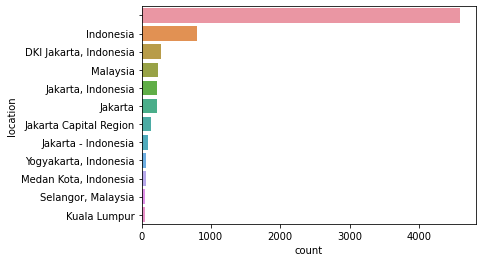

In [ ]:
import seaborn as sns

p = sns.countplot(y=data.location, order=pd.value_counts(data.location).iloc[:12].index)

In [ ]:
print('akun dengan followers terbanyak adalah ')
followers = data[['screen_name', 'followers_count']]
followers.sort_values(by=['followers_count'], ascending=False).head()

akun dengan followers terbanyak adalah 


,screen_name,followers_count
4672,detikcom,17305085
4629,detikcom,17305085
5004,detikcom,17305085
3253,detikcom,17305085
4936,detikcom,17305085


In [ ]:
print('tweet dengan like terbanyak adalah ')
likes = df[['text', 'favorite_count']]
likes.sort_values(by=['favorite_count'], ascending=False).head()

tweet dengan like terbanyak adalah 


,text,favorite_count
10626,Keputusan ini diambil oleh Ketua Umum PP PBSI ...,2031
11613,Untuk menyekat varian baru Covid-19 dari terja...,1808
4537,Data terkini menunjukkan dos penggalak vaksin ...,1142
7422,Belum ada bukti kasus omicron di Indonesia ya\...,617
11707,"BATAL ❌\nBarcelona, Real Madrid dan Atletico (...",534


In [ ]:
print('tweet dengan retweet terbanyak adalah ')
retweet = df[['text', 'retweet_count']]
retweet.sort_values(by=['retweet_count'], ascending=False).head()

tweet dengan retweet terbanyak adalah 


,text,retweet_count
2884,RT @amplanx: Ada wacana PPKM 6 minggu. Usaha g...,20514
6132,RT @redzuanNewsMPB: TERKINI\nKes pertama Varia...,17762
7754,RT @redzuanNewsMPB: TERKINI\nKes pertama Varia...,17762
9493,RT @redzuanNewsMPB: TERKINI\nKes pertama Varia...,17762
5770,RT @masfaizhakim: Perkara-perkara yang perlu t...,13772


# Pre Processing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('punkt')
from nltk import word_tokenize
import sys

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df  = df[['id_str','text']]

In [ ]:
#remover user mention
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt 

df['Tweet'] = np.vectorize(remove_pattern)(df['text'], "@[\w]*")
df

,id_str,text,Tweet
0,1469692153383174144,melaksanakan patroli Woro Woro dan operasi ma...,melaksanakan patroli Woro Woro dan operasi ma...
1,1469692034118139904,melaksanakan patroli Woro Woro dan operasi ma...,melaksanakan patroli Woro Woro dan operasi ma...
2,1469691708002635776,(11/12) Operasi Yustisi gabungan bersama TNI-P...,(11/12) Operasi Yustisi gabungan bersama TNI-P...
3,1469691311938686976,@melanians Loh bukannya ppkm nggkjadi meng? At...,Loh bukannya ppkm nggkjadi meng? Atau bakalan...
4,1469691190828158976,RT @muslimahnewscom: MuslimahNews – Apakah ben...,RT : MuslimahNews – Apakah benar pelaksanaan P...
...,...,...,...
11812,1466609637101228032,"ANTISIPASI @ganjarpranowo LIBUR NATARU, TEMPAT...","ANTISIPASI LIBUR NATARU, TEMPAT WISATA BUKA I..."
11813,1466603096797159424,WHO memperingatkan dunia untuk waspada terhada...,WHO memperingatkan dunia untuk waspada terhada...
11814,1466596162203369472,RT @KompasTV: Indonesia kali ini akan lebih wa...,RT : Indonesia kali ini akan lebih waspada den...
11815,1466593023173615616,RT @HumasPoldaJatim: Varian baru Virus Covid-1...,RT : Varian baru Virus Covid-19 mengancam Ayo ...


In [ ]:
df.drop(df.columns[[0,1]], axis = 1, inplace = True)

df

,Tweet
0,melaksanakan patroli Woro Woro dan operasi ma...
1,melaksanakan patroli Woro Woro dan operasi ma...
2,(11/12) Operasi Yustisi gabungan bersama TNI-P...
3,Loh bukannya ppkm nggkjadi meng? Atau bakalan...
4,RT : MuslimahNews – Apakah benar pelaksanaan P...
...,...
11812,"ANTISIPASI LIBUR NATARU, TEMPAT WISATA BUKA I..."
11813,WHO memperingatkan dunia untuk waspada terhada...
11814,RT : Indonesia kali ini akan lebih waspada den...
11815,RT : Varian baru Virus Covid-19 mengancam Ayo ...


In [ ]:
df.drop_duplicates(subset ="Tweet", keep = 'first', inplace = True) #menghilangkan duplikat

In [ ]:
df

,Tweet
0,melaksanakan patroli Woro Woro dan operasi ma...
1,melaksanakan patroli Woro Woro dan operasi ma...
2,(11/12) Operasi Yustisi gabungan bersama TNI-P...
3,Loh bukannya ppkm nggkjadi meng? Atau bakalan...
4,RT : MuslimahNews – Apakah benar pelaksanaan P...
...,...
11807,Jepang akan menutup perbatasannya untuk pendat...
11808,Covid-19 ni virus yg plg hebat lah setakat ni....
11810,"Varian baru Covid-19 Omicron diyakini akan ""me..."
11812,"ANTISIPASI LIBUR NATARU, TEMPAT WISATA BUKA I..."


In [ ]:
text =df['Tweet']
tweets = [x for x in text]

In [ ]:
tweets_preproc = []
for x in tweets:
  pattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
  pattern1 = re.compile(r'pic.twitter.com/(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
  x = re.sub(pattern,' ',x) #remove url
  x = re.sub(pattern1,' ',x)
  #convert to lower case
  x = x.lower()
  #convert www.* or https?://*
  x = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',x)
  #remove symbols
  x = re.sub(r'[^.,a-zA-Z0-9 \n\.]', ' ',x)
  x = x.replace(',',' ').replace('.',' ')
  #convert @username to AT_USERNAME
  x = re.sub('@+','',x)
  #remove angka
  x = re.sub('[0-9]+', '', x)
  # remove old style retweet text "RT"
  x = re.sub(r'^RT[\s]+', '', x)
  # remove hashtags
  # only removing the hash # sign from the word
  x = re.sub(r'#', '', x)
  #remove additional white spaces
  x = re.sub('[\s]+',' ',x)
  #replace word with word
  x = re.sub(r'#([^\s]+)',r'\1', x)
  #trim
  x = x.strip('\'"')
  tweets_preproc.append(str(x))

tweets_preproc

['melaksanakan patroli woro woro dan operasi masker agar selalu mematuhi m himbauan kpd masy ttg intruks ',
 'melaksanakan patroli woro woro dan operasi masker agar selalu mematuhi m himbauan kpd masy ttg intruks ',
 ' operasi yustisi gabungan bersama tni polri dalam rangka ppkm level guna pencegahan dan pengendalian covid ',
 ' loh bukannya ppkm nggkjadi meng atau bakalan ada kebijakan spesial natal tahun baru ',
 'rt muslimahnews apakah benar pelaksanaan ppkm baik saat idulfitri dan natal memang karena alasan medis tampak pembeda ',
 'rt tapi kenapa dalam baru berapa saat diumumkan ppkm level tiba tiba jadi tidak dr eva chaniago full youtube gt gt gt https ',
 'rt ksp moeldoko mengatakan pembatalan pemberlakuan pembatasan kegiatan masyarakat atau ppkm level merupakan kebijakan gas dan ',
 'kodim blitar laksanakan operasi yustisi ppkm secara humanis ',
 'kmrn br izin sm atasan buat minggu bsk lbr for nntn konser ehhhhhh td siang dpt kbr gagal krn ppkm lgdg diledekin ',
 ' ueueue gak b

In [ ]:
fSlang = '/content/Project_UAS/slangword.txt' #untuk mengatasi slang/singkatan kata
bahasa = 'id'
sw=open(fSlang,encoding='utf-8', errors ='ignore', mode='r');SlangS=sw.readlines();sw.close()
SlangS = {slang.strip().split(':')[0]:slang.strip().split(':')[1] for slang in SlangS}

In [ ]:
Docs=[]
df=open('/content/Project_UAS/stopword_id.txt', 'r', encoding='utf-8', errors ='replace')
Docs.append(df.readlines());df.close()
stops = set([t.strip() for t in Docs[0]]) #stopword
for x in ['virus', 'corona', 'twitter', 'pandemi','varian', 'covid','to', 'me','ne','a','ho','te','awa','sir','new','na','kya','bhi','jum','at','kes']:
  stops.add(x)

In [ ]:
def formaldanstop(t):
  t = word_tokenize(t)
  for i,x in enumerate(t):
    if x in SlangS.keys():
      t[i]=SlangS[x]
  return ''.join(' '.join(x for x in t if x not in stops))

In [ ]:
tweets_preproc2 = list(map(formaldanstop,tweets_preproc))
tweets_preproc2

['melaksanakan patroli woro woro operasi masker mematuhi himbauan masyarakat intruks',
 'melaksanakan patroli woro woro operasi masker mematuhi himbauan masyarakat intruks',
 'operasi yustisi gabungan tni polri rangka ppkm level pencegahan pengendalian',
 'ppkm nggkjadi kebijakan spesial natal',
 'muslimahnews pelaksanaan ppkm idulfitri natal alasan medis pembeda',
 'diumumkan ppkm level eva chaniago full youtube',
 'ksp moeldoko pembatalan pemberlakuan pembatasan kegiatan masyarakat ppkm level kebijakan gas',
 'kodim blitar laksanakan operasi yustisi ppkm humanis',
 'kemarin izin atasan minggu esok lbr for menonton konser ehhhhhh siang kbr gagal ppkm lgdg diledekin',
 'ueueue mobil kena ppkm kereta huhu butuh liburan ayooo liburaaan',
 'anggota kodim pekalongan melaksanakan patroli edukasi rangka pemberlakuan ppkm bagikan masker',
 'anggota kodim pekalongan melaksanakan patroli edukasi rangka pemberlakuan ppkm bagikan masker',
 'kemarin diajak jogja batal akibat ppkm duanya eueue',
 '

In [ ]:
!pip install Sastrawi

     |████████████████████████████████| 209 kB 5.2 MB/s 


In [ ]:
#filtering kembali menggunakan Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory 
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

stopword = StopWordRemoverFactory().create_stop_word_remover()
stemmer = StemmerFactory().create_stemmer()

clean_tweets = []

for i, kalimat in enumerate(tweets_preproc2):
  stop = stopword.remove(kalimat)
  stem = stemmer.stem(stop)
  print('loading kalimat ke: ',+i+1, 'dari',len(tweets_preproc2))
  clean_tweets.append(stem)

Streaming output truncated to the last 5000 lines.
loading kalimat ke:  366 dari 5365
loading kalimat ke:  367 dari 5365
loading kalimat ke:  368 dari 5365
loading kalimat ke:  369 dari 5365
loading kalimat ke:  370 dari 5365
loading kalimat ke:  371 dari 5365
loading kalimat ke:  372 dari 5365
loading kalimat ke:  373 dari 5365
loading kalimat ke:  374 dari 5365
loading kalimat ke:  375 dari 5365
loading kalimat ke:  376 dari 5365
loading kalimat ke:  377 dari 5365
loading kalimat ke:  378 dari 5365
loading kalimat ke:  379 dari 5365
loading kalimat ke:  380 dari 5365
loading kalimat ke:  381 dari 5365
loading kalimat ke:  382 dari 5365
loading kalimat ke:  383 dari 5365
loading kalimat ke:  384 dari 5365
loading kalimat ke:  385 dari 5365
loading kalimat ke:  386 dari 5365
loading kalimat ke:  387 dari 5365
loading kalimat ke:  388 dari 5365
loading kalimat ke:  389 dari 5365
loading kalimat ke:  390 dari 5365
loading kalimat ke:  391 dari 5365
loading kalimat ke:  392 dari 5365
load

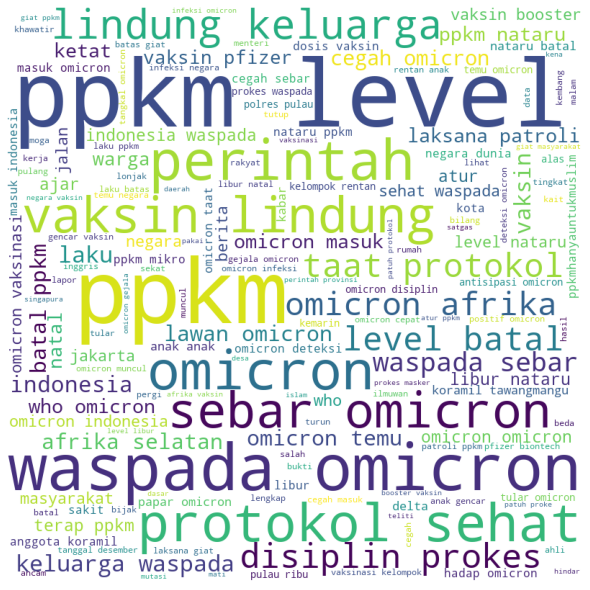

In [ ]:
from wordcloud import WordCloud, STOPWORDS

comment_words = ''
stopwords = set(stops)

for val in clean_tweets:
  #typecaste each val to string
  val = str(val)

  #split the value
  tokens = val.split()

  #convert each token into lowercase
  for i in range(len(tokens)):
    tokens[i]=tokens[i].lower()

  comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width=800, height=800,
                background_color = 'white', stopwords=stopwords,
                min_font_size = 10).generate(comment_words)

#plot the wordcloud image
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

In [ ]:
hasil = pd.DataFrame(clean_tweets, columns=["Clean_Text"])
hasil.to_csv('/content/Project_UAS/DataSementara.csv', index = False )

In [ ]:
sementara = pd.read_csv('/content/Project_UAS/DataSementara.csv')
print(sementara.shape)
sementara.head()

(5365, 1)


,Clean_Text
0,laksana patroli woro woro operasi masker patuh...
1,laksana patroli woro woro operasi masker patuh...
2,operasi yustisi gabung tni polri rangka ppkm l...
3,ppkm nggkjadi bijak spesial natal
4,muslimahnews laksana ppkm idulfitri natal alas...


In [ ]:
#cek missing value
sementara.isnull().sum()

Clean_Text    25
dtype: int64

In [ ]:
data_fix = sementara.dropna()
print(data_fix.shape)
data_fix.head()

(5340, 1)


,Clean_Text
0,laksana patroli woro woro operasi masker patuh...
1,laksana patroli woro woro operasi masker patuh...
2,operasi yustisi gabung tni polri rangka ppkm l...
3,ppkm nggkjadi bijak spesial natal
4,muslimahnews laksana ppkm idulfitri natal alas...


In [ ]:
#data_fix.to_csv('/content/Project_UAS/dataCleanText.csv', index = False ) #menyimpan data yang sudah tidak ada missing value

In [ ]:
#result = pd.read_csv('/content/Project_UAS/dataCleanText.csv')
#result

In [ ]:
#labeli dahulu secara manual

#baca file yang sudah dilabeli
import pandas as pd
result = pd.read_excel("/content/Project_UAS/data/dataCleanTextFinal.xlsx")
result

,Clean_Text,Label
0,laksana patroli woro woro operasi masker patuh...,positif
1,laksana patroli woro woro operasi masker patuh...,positif
2,operasi yustisi gabung tni polri rangka ppkm l...,positif
3,ppkm nggkjadi bijak spesial natal,netral
4,muslimahnews laksana ppkm idulfitri natal alas...,positif
...,...,...
5335,jepang tutup batas datang khawatir muncul,netral
5336,pulang hebat takat mutate kena hadap haihh,netral
5337,omicron yakin banjir dunia cepat bijak,netral
5338,antisipasi libur nataru wisata buka prokes gan...,netral


In [ ]:
result.to_csv('dataFinal.csv')

In [ ]:
final = pd.read_csv('dataFinal.csv')
final

,Unnamed: 0,Clean_Text,Label
0,0,laksana patroli woro woro operasi masker patuh...,positif
1,1,laksana patroli woro woro operasi masker patuh...,positif
2,2,operasi yustisi gabung tni polri rangka ppkm l...,positif
3,3,ppkm nggkjadi bijak spesial natal,netral
4,4,muslimahnews laksana ppkm idulfitri natal alas...,positif
...,...,...,...
5335,5335,jepang tutup batas datang khawatir muncul,netral
5336,5336,pulang hebat takat mutate kena hadap haihh,netral
5337,5337,omicron yakin banjir dunia cepat bijak,netral
5338,5338,antisipasi libur nataru wisata buka prokes gan...,netral


In [ ]:
final.drop(final.columns[[0]], axis = 1, inplace = True)
final

,Clean_Text,Label
0,laksana patroli woro woro operasi masker patuh...,positif
1,laksana patroli woro woro operasi masker patuh...,positif
2,operasi yustisi gabung tni polri rangka ppkm l...,positif
3,ppkm nggkjadi bijak spesial natal,netral
4,muslimahnews laksana ppkm idulfitri natal alas...,positif
...,...,...
5335,jepang tutup batas datang khawatir muncul,netral
5336,pulang hebat takat mutate kena hadap haihh,netral
5337,omicron yakin banjir dunia cepat bijak,netral
5338,antisipasi libur nataru wisata buka prokes gan...,netral


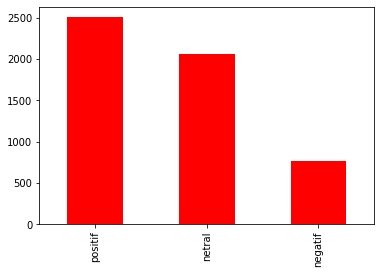

In [ ]:
final['Label'].value_counts().plot.bar(color = 'red', figsize = (6, 4))

# Modelling

In [ ]:
#menggunakan metode Support Vector Machine
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.metrics import accuracy_score

# Split into train and test data

train_X, test_X, train_Y, test_Y = model_selection.train_test_split(final['Clean_Text'], final['Label'], test_size = 0.1, random_state = 0)
# random_state = 0 menyatakan tidak ada pengacakan pada data yang di split yang artinya urutannya masih sama

In [ ]:
df_train90 = pd.DataFrame()
df_train90['Clean_Text'] = train_X
df_train90['Label'] = train_Y

df_test10 = pd.DataFrame()
df_test10['Clean_Text'] = test_X
df_test10['Label'] = test_Y

In [ ]:
df_train90

,Clean_Text,Label
965,ppkm,netral
3373,ingat menteri utama skotlandia nicola sturgeon...,netral
3512,kemenkes sedia perangkat komponen kit deteksi ...,positif
1471,karanganyar desember serma firman anggota kora...,positif
4581,waspada omicron presiden gencar vaksinasi,positif
...,...,...
4931,antisipasi omicron ganjar pusat ketat pintu ma...,netral
3264,sajid javid kesah omicron rebak komuniti angga...,netral
1653,tagar kaya ppkmhanyauntukmuslim tolol banget s...,negatif
2607,buruk temu vaksin ingat waspada omicron,negatif


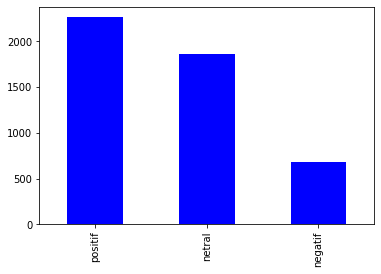

In [ ]:
df_train90['Label'].value_counts().plot.bar(color = 'blue', figsize = (6, 4))

In [ ]:
df_test10

,Clean_Text,Label
4767,takut kena omicron kosan,negatif
3135,lonjak hari muncul omicron menteri uang menkeu...,netral
4154,omicron masuk beberapa negara,netral
1837,anjir definisi panik level ppkm,netral
4468,botswana klaim lonjak rawat inap akibat omicron,negatif
...,...,...
2141,waspada sebar omicron afrika vaksin lindung ke...,positif
4181,perintah komitmen optimalisasi kapasitas testi...,positif
446,operasi yustisi malam tim gabung koramil godon...,positif
3073,halo baca temu nama omicron nyala alarm dunia ...,netral


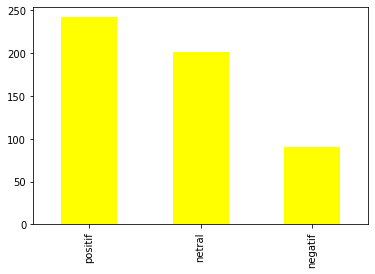

In [ ]:
df_test10['Label'].value_counts().plot.bar(color = 'yellow', figsize = (6, 4))

In [ ]:
df_train90.to_csv("df_train90.csv") #menyimpan data train
df_test10.to_csv("df_test10.csv") #menyimpan data test

In [ ]:
# TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect_9010 = TfidfVectorizer(max_features = 5000)
tfidf_vect_9010.fit(final['Clean_Text'])
train_X_tfidf_9010 = tfidf_vect_9010.transform(df_train90['Clean_Text'])
test_X_tfidf_9010 = tfidf_vect_9010.transform(df_test10['Clean_Text'])

In [ ]:
tfidf_vect_9010

TfidfVectorizer(max_features=5000)

In [ ]:
print(train_X_tfidf_9010)

  (0, 3355)	1.0
  (1, 4730)	0.3059768746689418
  (1, 4198)	0.4079130482520539
  (1, 4091)	0.36717740369731083
  (1, 2959)	0.4079130482520539
  (1, 2876)	0.4079130482520539
  (1, 2847)	0.19069296557518514
  (1, 2633)	0.26003863215427403
  (1, 1883)	0.28459765916477175
  (1, 790)	0.2956349381323007
  (2, 3861)	0.3172548403372232
  (2, 3680)	0.3833726922747324
  (2, 3170)	0.39234374085907064
  (2, 2964)	0.08838125516241656
  (2, 2184)	0.41747868139771743
  (2, 2152)	0.39234374085907064
  (2, 2110)	0.2684616406094803
  (2, 1019)	0.23241055469541108
  (2, 442)	0.3692174278386973
  (3, 4397)	0.35074605786414337
  (3, 4382)	0.3195381161575413
  (3, 3978)	0.35266952790192907
  (3, 3075)	0.2702315747802388
  (3, 2263)	0.24601951413294412
  (3, 2208)	0.2770287273275559
  :	:
  (4802, 2129)	0.3382745663505555
  (4802, 1967)	0.40330856066768545
  (4802, 1956)	0.2925388605400624
  (4802, 175)	0.41746330369890944
  (4803, 4846)	0.23798991061743763
  (4803, 4557)	0.37614891551195706
  (4803, 4302)	0.

In [ ]:
print(test_X_tfidf_9010)

  (0, 4321)	0.6749480619785726
  (0, 2964)	0.2235027256410262
  (0, 2111)	0.703200999190417
  (1, 4650)	0.35779799773211446
  (1, 3114)	0.46265849155223093
  (1, 2964)	0.09347871365333378
  (1, 2799)	0.262843978698421
  (1, 2633)	0.2814862211489221
  (1, 2622)	0.46265849155223093
  (1, 2358)	0.31081054815200787
  (1, 2144)	0.3029894938067285
  (1, 1657)	0.3137025394658308
  (2, 2964)	0.165836459501652
  (2, 2847)	0.3662024373023473
  (2, 2494)	0.40584595688219194
  (2, 473)	0.8207820069276344
  (3, 3355)	0.15473277471377855
  (3, 3031)	0.46861576654415416
  (3, 2329)	0.2256573932227546
  (3, 982)	0.6371356041287047
  (3, 192)	0.5473518015052763
  (4, 3554)	0.4219221690164151
  (4, 2964)	0.11023186790164345
  (4, 2358)	0.36651367939643925
  (4, 2157)	0.35729094412605866
  :	:
  (531, 3355)	0.0728138654241384
  (531, 3311)	0.17297303017047325
  (531, 2986)	0.39114912130404755
  (531, 2418)	0.1971434803413256
  (531, 2304)	0.25757180718944306
  (531, 2208)	0.1646720222340478
  (531, 1552)

In [ ]:
print(train_X_tfidf_9010.shape)
print(test_X_tfidf_9010.shape)

(4806, 5000)
(534, 5000)


In [ ]:
# Proses Pelatihan

from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(train_X_tfidf_9010,train_Y)

SVC(kernel='linear')

In [ ]:
# Proses Pengujian

from sklearn.metrics import accuracy_score

predictions_SVM_9010 = model.predict(test_X_tfidf_9010)
test_prediction_9010 = pd.DataFrame()
test_prediction_9010['Clean_Text'] = test_X
test_prediction_9010['Label'] = predictions_SVM_9010
SVM_accuracy_9010 = accuracy_score(predictions_SVM_9010, test_Y)*100
SVM_accuracy_9010 = round(SVM_accuracy_9010,1)

In [ ]:
test_prediction_9010

,Clean_Text,Label
4767,takut kena omicron kosan,netral
3135,lonjak hari muncul omicron menteri uang menkeu...,netral
4154,omicron masuk beberapa negara,netral
1837,anjir definisi panik level ppkm,netral
4468,botswana klaim lonjak rawat inap akibat omicron,netral
...,...,...
2141,waspada sebar omicron afrika vaksin lindung ke...,positif
4181,perintah komitmen optimalisasi kapasitas testi...,netral
446,operasi yustisi malam tim gabung koramil godon...,positif
3073,halo baca temu nama omicron nyala alarm dunia ...,netral


In [ ]:
test_prediction_9010.to_csv("test_prediction_9010.csv")

In [ ]:
SVM_accuracy_9010

71.9

In [ ]:
# Accuracy, Precision, Recall, f1-score

from sklearn.metrics import classification_report

print ("\nHere is the classification report:") 
print (classification_report(test_Y, predictions_SVM_9010))


Here is the classification report:
              precision    recall  f1-score   support

     negatif       0.68      0.37      0.48        91
      netral       0.64      0.79      0.71       201
     positif       0.80      0.79      0.80       242

    accuracy                           0.72       534
   macro avg       0.71      0.65      0.66       534
weighted avg       0.72      0.72      0.71       534

